<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/Face_recognition_moduleIndexation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation des modules

In [ ]:
!pip install opencv-python dlib mediapipe face-alignment matplotlib numpy torch torchvision

#Chargement de modules

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from PIL import Image

NameError: name 'audio_classifier' is not defined

Saving 0008.jpg to 0008 (1).jpg


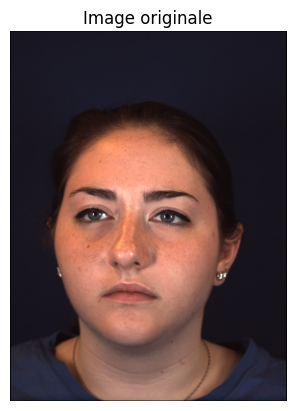

In [ ]:
# Charger une image
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.title("Image originale")
plt.show()


#Détection de visage (Haar Cascade)

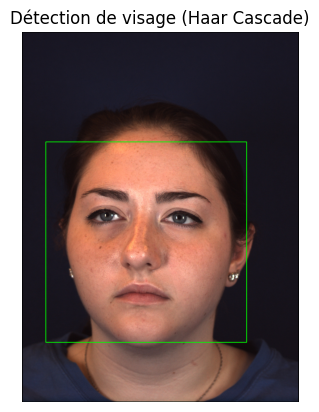

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

img_rgb1 = img_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb1, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img_rgb1)
plt.axis("off")
plt.title("Détection de visage (Haar Cascade)")
plt.show()


#Détection de visage (Mediapipe)

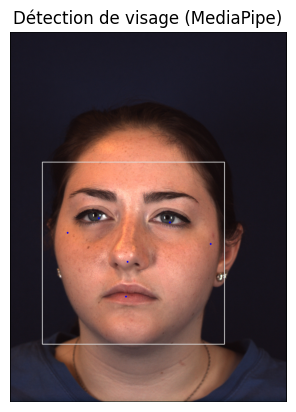

In [ ]:
mp_face_detection = mp.solutions.face_detection
detector = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

results = detector.process(img_rgb)

img_rgb1 = img_rgb.copy()
if results.detections:
    for detection in results.detections:
        mp.solutions.drawing_utils.draw_detection(img_rgb1, detection)

plt.imshow(img_rgb1)
plt.axis("off")
plt.title("Détection de visage (MediaPipe)")
plt.show()


#Détection de points d'intérêts (Mediapipe)

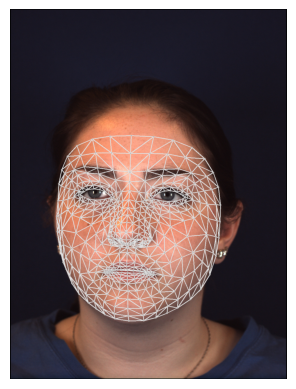

In [ ]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

results = face_mesh.process(img_rgb)

img_rgb1 = img_rgb.copy()
if results.multi_face_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        img_rgb1,
        results.multi_face_landmarks[0],
        mp_face_mesh.FACEMESH_TESSELATION,
        mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style()
    )

plt.imshow(img_rgb1)
plt.axis("off")
plt.show()



#Segmentation de visage (Mediapipe)

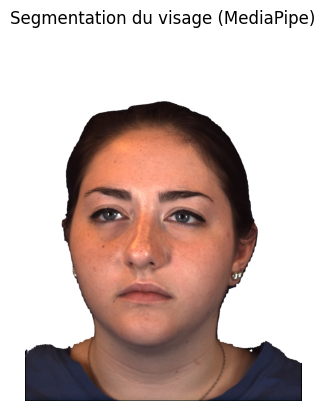

In [ ]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmenter = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)
result = segmenter.process(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

mask = result.segmentation_mask
segmented = np.where(mask[..., None] > 0.5, img_rgb, 255)  # fond blanc
plt.imshow(segmented)
plt.axis("off")
plt.title("Segmentation du visage (MediaPipe)")
plt.show()


#Reconnaissance des émotions

In [ ]:
!pip install mediapipe opencv-python deepface matplotlib

import cv2
import mediapipe as mp
from deepface import DeepFace
import matplotlib.pyplot as plt

# Détecter le visage avec MediaPipe
mp_face = mp.solutions.face_detection
with mp_face.FaceDetection(min_detection_confidence=0.6) as detector:
    results = detector.process(img_rgb)

    if results.detections:
        det = results.detections[0]
        bbox = det.location_data.relative_bounding_box
        h, w, _ = img_rgb.shape
        x = int(bbox.xmin * w)
        y = int(bbox.ymin * h)
        bw = int(bbox.width * w)
        bh = int(bbox.height * h)

        # Recadrer le visage
        face_img = img_rgb[y:y+bh, x:x+bw]

        # Reconnaissance de l'émotion
        result = DeepFace.analyze(face_img, actions=['emotion'], enforce_detection=False)
        emotion = result[0]['dominant_emotion']
        print(f"Émotion détectée : {emotion}")

        # Affichage
        cv2.rectangle(img_rgb, (x, y), (x+bw, y+bh), (0, 255, 0), 2)
        cv2.putText(img_rgb, emotion, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        plt.figure(figsize=(8,8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("Détection d'expression faciale")
        plt.show()

    else:
        print("Aucun visage détecté.")

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Charger une image
from google.colab import files
uploaded = files.upload()

video_path = list(uploaded.keys())[0]


cap = cv2.VideoCapture(video_path)  # Remplacer 0 par "video.mp4" pour lire une vidéo

from deepface import DeepFace
mp_face = mp.solutions.face_detection
with mp_face.FaceDetection(min_detection_confidence=0.6) as detector:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = detector.process(img_rgb)

        if results.detections:
            for det in results.detections:
                bbox = det.location_data.relative_bounding_box
                h, w, _ = frame.shape
                x, y = int(bbox.xmin * w), int(bbox.ymin * h)
                bw, bh = int(bbox.width * w), int(bbox.height * h)
                face = frame[y:y+bh, x:x+bw]

                result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
                emotion = result[0]['dominant_emotion']

                cv2.rectangle(frame, (x, y), (x+bw, y+bh), (0,255,0), 2)
                cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

        cv2_imshow(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

NameError: name 'core' is not defined